# Ark Nova Analysis

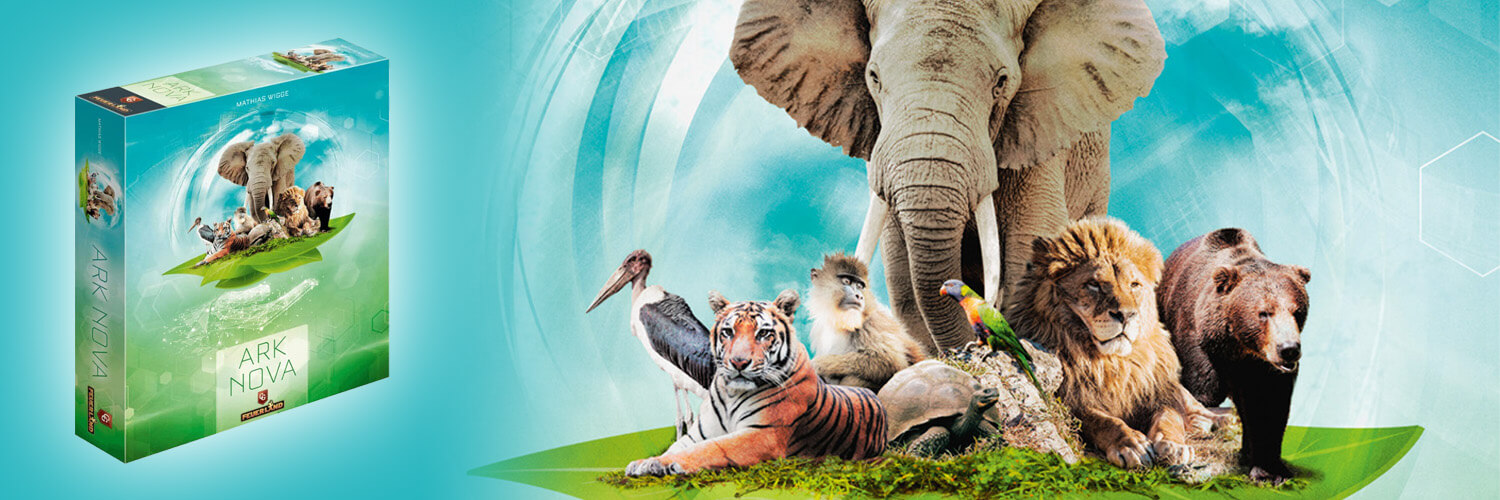

Ark Nova is a strategy board game where players take on the role of zoo directors with the goal of establishing and running a successful zoo.  It involves elements such as building enclosures, housing animals, supporting conservation projects, and attracting visitors.  Players must balance elements such as card drafting, resource management and strategic planning in order to establish the best zoo.  

In [59]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [60]:
# Loading the data
animals_df = pd.read_excel(r"C:\Users\david\Documents\arknovaanimals_data.xlsx", sheet_name='Animals')

## Exploratory Analysis

In [61]:
animals_df.head()

,Card #,Animal Card Name,Animal Latin name,Enclosure size,Cost,Type,Continent,Reqs,Ability,Bonuses (A/C/R)
0,401,CHEETAH,Acinonyx jubatus,5,17,Predator x2,Africa,NaN,Sprint 3,6/0/0
1,402,LION,Panthera leo,4,16,Predator,Africa,Predator x3,Pack,9/0/0
2,403,LEOPARD,Panthera pardus,3,20,Predator,Africa,Partner zoo,Hunter 4,7/1/0
3,404,CARACAL,Caracal caracal,2,9,Predator,Africa,NaN,Hunter 2,4/0/0
4,405,FENNEC FOX,Vulpes zerda,1,8,Predator,Africa,NaN,Clever,3/0/0


In [62]:
animals_df.describe()

,Card #,Cost
count,128.000000,128.000000
mean,464.500000,14.414062
std,37.094474,6.295264
min,401.000000,4.000000
25%,432.750000,10.000000
50%,464.500000,13.000000
75%,496.250000,17.000000
max,528.000000,36.000000


The average cost of an animal card is about 14.4, with a standard deviation of approximately 6.3, so costs are moderately spread around the average value.

In [63]:
# Check for null values
animals_df.isnull().sum()

Card #                0
Animal Card Name      0
Animal Latin name     0
Enclosure size        0
Cost                  0
Type                  0
Continent             0
Reqs                 65
Ability              10
Bonuses (A/C/R)       0
dtype: int64

We have some null values in the abilities and requirements columns, which is expected since not all animals have an ability or special requirements.  The other null values have to do with an expansion added to the game which I will not be focusing on in this analysis.

In [64]:
# Replacing nulls with "None" in 'Reqs' and 'Ability' columns
animals_df['Reqs'].fillna('None', inplace=True)
animals_df['Ability'].fillna('None', inplace=True)

# Verifying the changes
animals_df[['Reqs', 'Ability']].head()

,Reqs,Ability
0,None,Sprint 3
1,Predator x3,Pack
2,Partner zoo,Hunter 4
3,None,Hunter 2
4,None,Clever


## Analyzing 'Tags'

In Ark Nova, tags are a key part of the game.  They represent things like animal types and continents.  Strong cards often require certain tags to exist in your zoo to play.  Tags are also crucial for completing conservation projects, which are one of the strongest ways to score points.

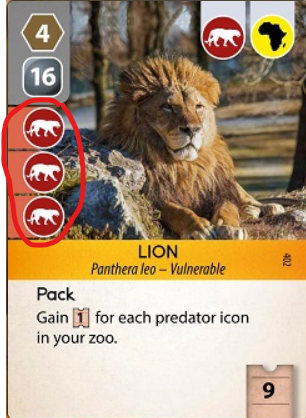

For example, the Lion:
- Requires 3 'Predator' tags to be played, shown on the left 
- Provides 1 'Predator' tag and 1 'Africa' tag when played, shown at the top.

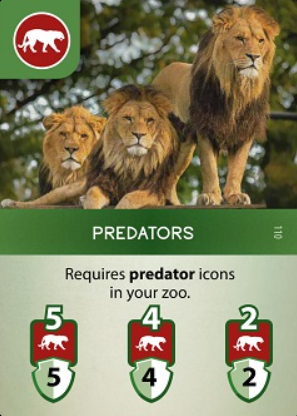

While this conservation project provides points based on 'predator' tags in your zoo.

Lets jump into analysis!

In [65]:
# Frequency of Animal Types and Continent Tags
type_counts = animals_df['Type'].value_counts()
continent_counts = animals_df['Continent'].value_counts()

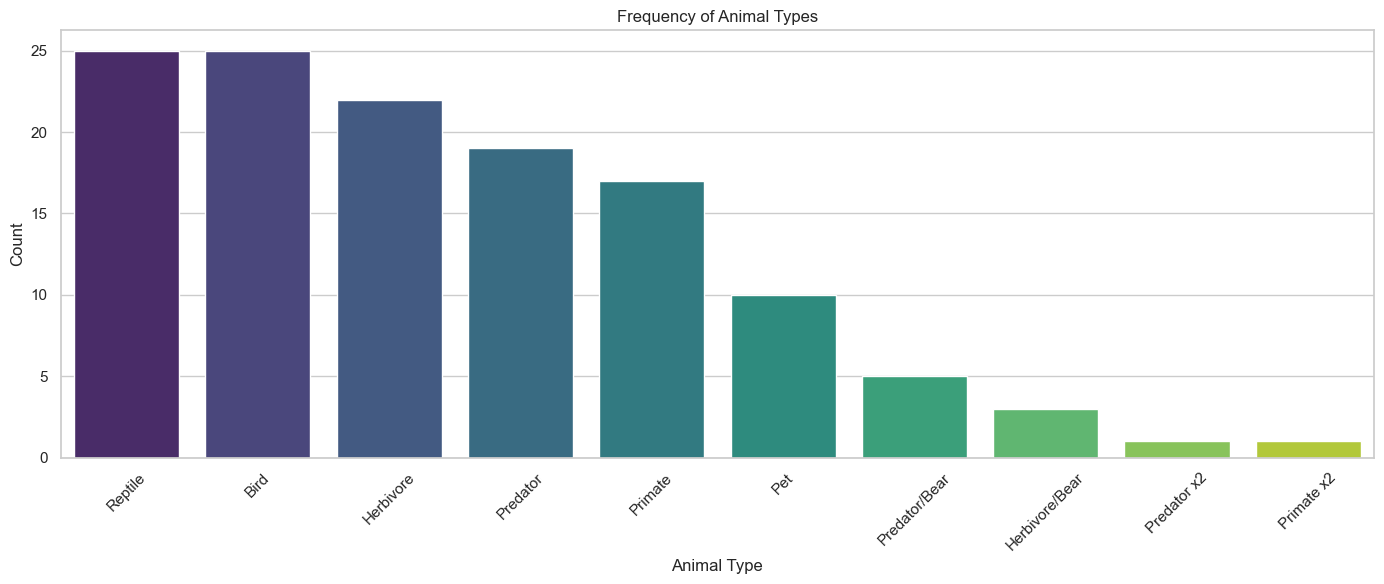

In [66]:
plt.figure(figsize=(14, 6))

# Plot for Animal Types
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title('Frequency of Animal Types')
plt.ylabel('Count')
plt.xlabel('Animal Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**A note about 'Pets'**: Pets are a special type of animal.  I have included them in the data set, but they should be thought of differently than the other animals due to their unique attributes and complete lack of synergy with other cards.

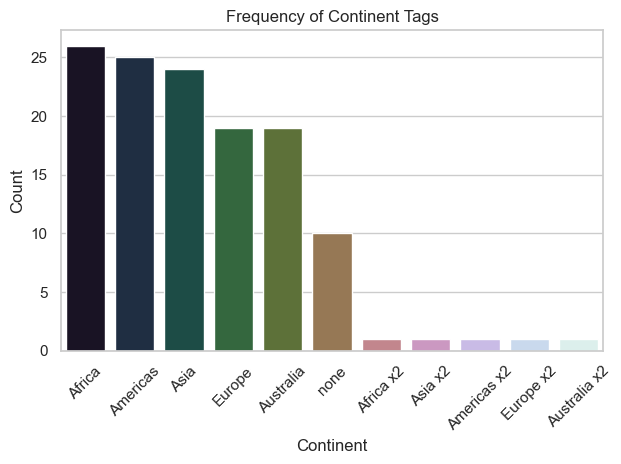

In [67]:
# Plot for Continent Tags
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette="cubehelix")
plt.title('Frequency of Continent Tags')
plt.ylabel('Count')
plt.xlabel('Continent')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Based on this analysis we can ascertain a few things:

1. **Birds and Reptiles are Most Common**: With a high frequency of bird and reptile tags, players have many options for bird/reptile related strategies. This abundance makes it easier to achieve synergy with and fulfill requirements for bird or reptile centric cards, as well as conservation projects.

2. **Primates are least common**: When the dual tags such as Bear/Predator and the x2 tags are accounted for, Primates are the least common animal tag by a wide margin.

3. **Africa Tags Predominate**: The dominance of African tags suggests an advantage in completing conservation projects related to African animals.  However, the margins between Africa, Americas, and Asia are so small it is almost negligible, so all three should be considered strong options.  Players should consider focusing on these, but also expect competition.

4. **Diversity vs. Specialization**: While common tags offer clear pathways, maintaining a mix of diverse tags ensures flexibility. Rare tags could provide strategic niches with less competition.



**Conclusions**: While the most common tags provide clear opportunities, there is a good distribution of all tags, and the strategic value of less common tags should not be overlooked. 

## Cost Analysis

All animals in Ark Nova are associated with a cost to play, with higher cost animals generally providing more appeal (one of two ways to score points) and/or strong abilities.  

Lets look at how the cost of cards is distributed and how it relates to other attributes such as bonuses and enclosure sizes.

In [68]:
# Analyzing the Cost Distribution
cost_distribution = animals_df['Cost'].describe()

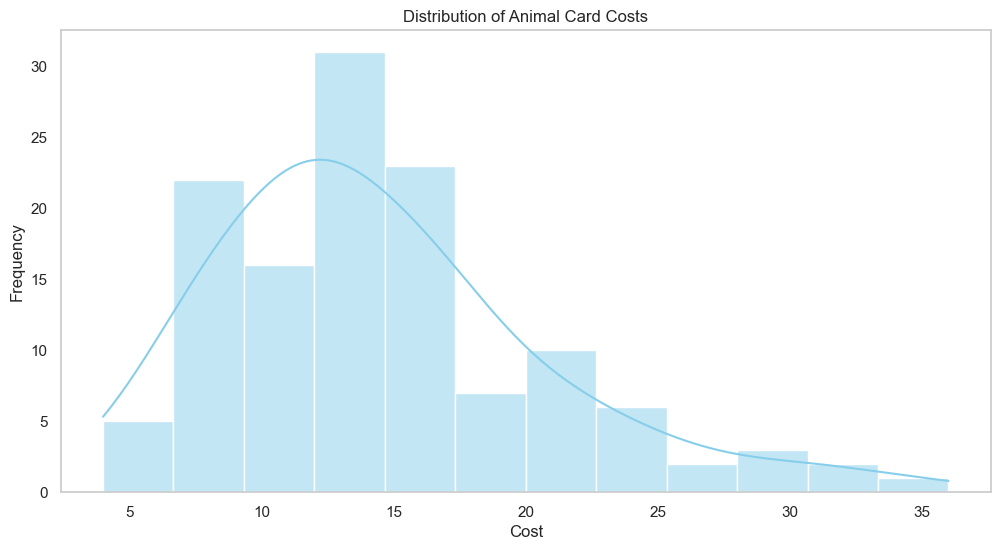

count    128.000000
mean      14.414062
std        6.295264
min        4.000000
25%       10.000000
50%       13.000000
75%       17.000000
max       36.000000
Name: Cost, dtype: float64

In [69]:
# Visualizing the Cost Distribution
plt.figure(figsize=(12, 6))
sns.histplot(animals_df['Cost'], kde=True, color='skyblue')
plt.title('Distribution of Animal Card Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Displaying the statistical summary of the cost distribution
cost_distribution

Knowing the average and range of costs should help with budgeting and planning purchases throughout the game.  If you are able to maintain at least 13 money units, you can afford to play 50% of animals, while just 4 more money units will allow you to play 75% of animals.  This provides good budgeting targets when unsure exactly what your next play will be.

### How does cost relate to appeal, conservation, and prestige?

In Ark Nova there are 3 different score trackers to be aware of. 

- The **Appeal** tracker relates to how appealing your zoo is, and is included in end game scoring. Appeal can be increased in a variety of ways, the most common being adding a new animal. 
- The **Conservation** tracker relates to your zoos conservation efforts, and is also included in end game scoring.  Conservation can be increased through a variety of ways as well, but mostly through supporting conservation projects.
- The **Reputation** tracker is not included in end game scoring, but provides many useful bonuses if increased.

In our dataset, the bonuses an animal provides are combined in a single column with the format "A/C/P".  To perform a meaningful analysis, we will need to seperate these into distinct columns.

In [70]:
# Splitting the 'Bonuses (A/C/R)' column into separate columns for Attractiveness, Conservation, and Reputation
bonuses_split = animals_df['Bonuses (A/C/R)'].str.split('/', expand=True)
bonuses_split.columns = ['Appeal', 'Conservation', 'Reputation']

In [71]:
# Converting the new columns to numeric types
bonuses_split = bonuses_split.apply(pd.to_numeric, errors='coerce')

In [72]:
# Adding new columns to the original DataFrame
animals_df = animals_df.join(bonuses_split)

# Displaying the first few rows to verify the changes
animals_df[['Cost', 'Bonuses (A/C/R)', 'Appeal', 'Conservation', 'Reputation']].head()

,Cost,Bonuses (A/C/R),Appeal,Conservation,Reputation
0,17,6/0/0,6,0,0
1,16,9/0/0,9,0,0
2,20,7/1/0,7,1,0
3,9,4/0/0,4,0,0
4,8,3/0/0,3,0,0


Now that the columns are split, lets analyze how each correlates with card cost.

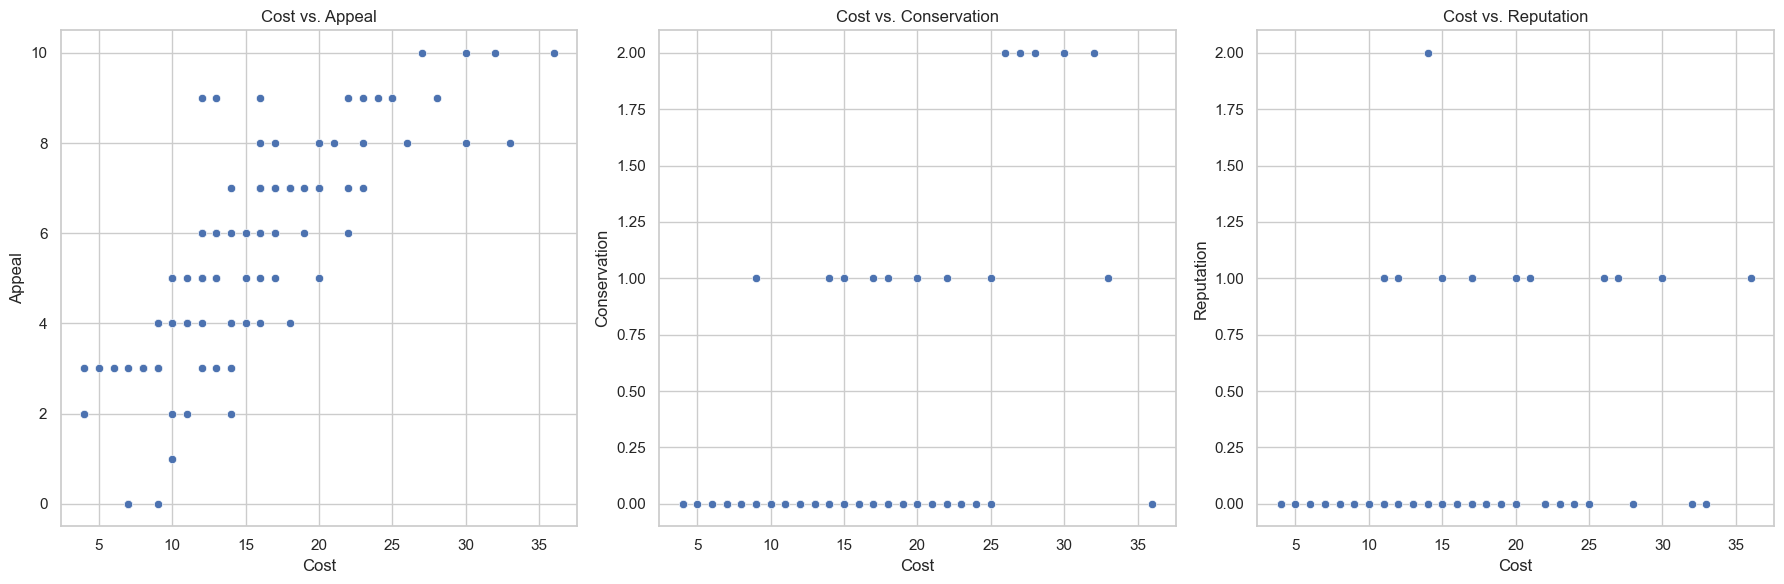

,Cost,Appeal,Conservation,Reputation
Cost,1.000000,0.807744,0.564443,0.307901
Appeal,0.807744,1.000000,0.342649,0.171106
Conservation,0.564443,0.342649,1.000000,0.320609
Reputation,0.307901,0.171106,0.320609,1.000000


In [73]:
# Analyzing the correlation between cost and each type of bonus (Appeal, Conservation, Reputation)
correlation_analysis = animals_df[['Cost', 'Appeal', 'Conservation', 'Reputation']].corr()

# Visualizing the relationship between Cost and each type of bonus
plt.figure(figsize=(18, 6))

# Cost vs. Appeal
plt.subplot(1, 3, 1)
sns.scatterplot(x='Cost', y='Appeal', data=animals_df_split)
plt.title('Cost vs. Appeal')

# Cost vs. Conservation
plt.subplot(1, 3, 2)
sns.scatterplot(x='Cost', y='Conservation', data=animals_df_split)
plt.title('Cost vs. Conservation')

# Cost vs. Reputation
plt.subplot(1, 3, 3)
sns.scatterplot(x='Cost', y='Reputation', data=animals_df_split)
plt.title('Cost vs. Reputation')

plt.tight_layout()
plt.show()

correlation_analysis

Unsurprisingly, there is a positive correlation related to cost for all three categories.  These findings can guide strategic decisions regarding which animal cards to prioritize for purchase, based on the type of bonuses that align with the player's game objectives.

### Building Costs

Another key aspect of Ark Nova is building enclosures for our animals.  Players begin the game with a zoo map, which provides a designated space for building various zoo features, including enclosures for animals.  Each animal card has an enclosure requirement, ranging from sizes 1-5.  Building an enclosure incurs a cost, 2 money units per 1 size.  To conduct an effective analysis, we will look at the distribution of enclosure requirements, and calculate a total cost for each animal, which includes the cost of its enclosure.

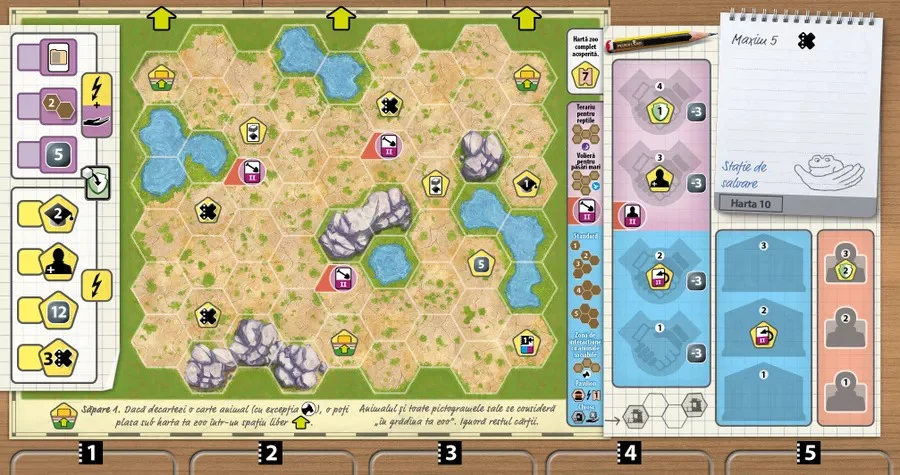

One of Ark Nova's zoo maps.

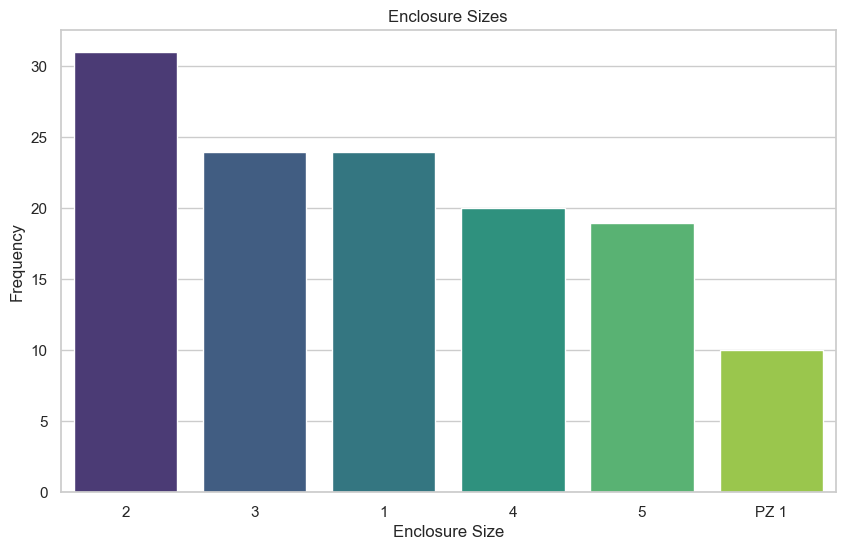

2       31
3       24
1       24
4       20
5       19
PZ 1    10
Name: Enclosure size, dtype: int64

In [74]:
# Visualizing the distribution of enclosure sizes
enclosure_sizes = animals_df['Enclosure size'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=enclosure_sizes.index, y=enclosure_sizes.values, palette="viridis")
plt.title('Enclosure Sizes')
plt.xlabel('Enclosure Size')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

enclosure_sizes

From our visualization, it's clear that size 2 enclosures are the most frequently required while size 5 enclosures are less common.  PZ refers to the petting zoo which is a special enclosure that holds 3 pets.  Since only 10 animals can fit in the petting zoo, it would bedifficult to use effectively.

### Which animal cards provide the best value?

#### Calculating Total Cost

When evalutating the cost-effectiveness of each animal, it is important to consider both the purchase cost of the animal and the cost of its required enclosure.  To calculate the total cost we must:

1. **Calculate Enclosure Cost**: Multiply the enclosure size by the cost per size unit (2 money units per size) to get the enclosure cost for each animal.

2. **Total Cost**: Add the enclosure cost to the purchase cost of the animal card. This total cost represents the combined expense of acquiring the animal and providing the necessary enclosure.

In [75]:
# Filtering out 'Pets' as they occupy a unique enclosure
animals_df = animals_df[animals_df['Type'] != 'Pet']

In [76]:
# Calculating total cost
animals_df['Total Cost'] = animals_df['Cost'] + (animals_df['Enclosure size'].astype(int) * 2)

In [77]:
# Verifying 'Total Cost' column is correct
animals_df[['Animal Card Name', 'Cost', 'Enclosure size', 'Total Cost']].head()

,Animal Card Name,Cost,Enclosure size,Total Cost
0,CHEETAH,17,5,27
1,LION,16,4,24
2,LEOPARD,20,3,26
3,CARACAL,9,2,13
4,FENNEC FOX,8,1,10


Now we are ready to see which animals provide the best value.

In [78]:
# Calculate appeal-to-cost ratio
animals_df['Appeal_to_Cost_Ratio'] = animals_df['Appeal'] / animals_df['Total Cost']

In [79]:

best_value_animals = animals_df.sort_values(by='Appeal_to_Cost_Ratio', ascending=False)
top_10_best_value_animals = best_value_animals.head(10)

In [80]:
top_10_best_value_animals

,Card #,Animal Card Name,Animal Latin name,Enclosure size,Cost,Type,Continent,Reqs,Ability,Bonuses (A/C/R),Appeal,Conservation,Reputation,Total Cost,Appeal_to_Cost_Ratio
105,506,KING VULTURE,Sarcoramphus papa,3,12,Bird,Americas,Bird x3,Scavenging 5,9/0/0,9,0,0,18,0.500000
19,420,STOAT,Mustela erminea,1,4,Predator,Europe,Europe,Hunter 1,3/0/0,3,0,0,6,0.500000
68,469,NILE CROCODILE,Crocodylus niloticus,5,13,Reptile,Africa,Reptile x3,Snapping 2,9/0/0,9,0,0,23,0.391304
73,474,INDIAN ROCK PYTHON,Python molurus,2,14,Reptile,Asia,Reptile x2,Constriction,7/0/0,7,0,0,18,0.388889
28,429,GREVY'S ZEBRA,Equus grevyi,2,12,Herbivore,Africa,Africa x3,Boost: Sponsors\nFlock Animal 2,6/0/1,6,0,1,16,0.375000
1,402,LION,Panthera leo,4,16,Predator,Africa,Predator x3,Pack,9/0/0,9,0,0,24,0.375000
92,493,THORNY DEVIL,Moloch horridus,1,6,Reptile,Australia,None,None,3/0/0,3,0,0,8,0.375000
83,484,EUROPEAN POND TURTLE,Emys orbicularis,1,9,Reptile,Europe,None,None,4/0/0,4,0,0,11,0.363636
43,444,ALPINE IBEX,Capra ibex,2,10,Herbivore,Europe,None,Jumping 2,5/0/0,5,0,0,14,0.357143
91,492,INLAND TAIPAN,Oxyuranus microlepidotus,2,10,Reptile,Australia,Australia\nScience,Venom 2,5/0/0,5,0,0,14,0.357143


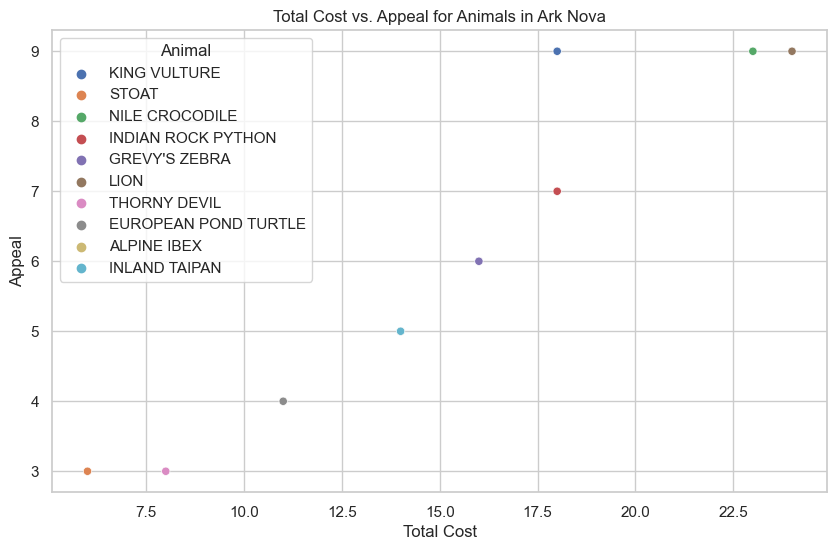

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_best_value_animals, x='Total Cost', y='Appeal', hue='Animal Card Name', palette='deep')
plt.title('Total Cost vs. Appeal for Animals in Ark Nova')
plt.xlabel('Total Cost')
plt.ylabel('Appeal')
plt.legend(title='Animal')
plt.show()


Animals like the King Vulture, Stoat, and Nile Crocodile stand out as they provide a high appeal score relative to their cost.  This indicates the they are efficient choices for boosting your zoo's appeal without a significant expenditure.

It should be noted that conservation points and prestige boost a cards value significantly.  However, to quantify the increase in value that they provide can only be subjective, and I will not dive into that in this analysis.

## Conclusion

This analysis has provided insight into the dynamics of managing a zoo within the game's strategic framework. Here are some insights we gathered:

1. **Strategic Use of Tags**: The predominance of birds and reptiles, along with African tags, opens avenues for focused strategies around these elements. While these common tags offer clear pathways, the strategic value of other tags shouldn't be overlooked.  
2. **Balancing Diversity and Specialization**: Although certain tags are more abundant, maintaining a diverse collection of animal types can be beneficial. This approach ensures flexibility and the ability to adapt to various conservation projects and card requirements as the game progresses.
3. **Cost Management**: Keeping 13-17 money units allows purchasing a broad range of animals. As the game progresses, and your budget increases, you may want to play more expensive animals, which are positively correlated with greater rewards.
4. **Enclosures**: Given that size 2 enclosures are most commonly required, building them is a safe bet, ensuring readiness for a variety of animals.
5. **Importance of a holistic approach**: While the analysis focused on quantifiable aspects like cost and appeal, it is crucial to remember the value of conservation points, reputation, and special abilities. 

In essence, Ark Nova's complexity necessitates a balanced approach, blending high-appeal animals with practical cost and enclosure considerations. Knowing the distribution of tags can help players make strategic decisions on which conservation projects to focus on, and which to cut your losses on.  The information presented here can help one navigate these elements, but each games unique dynamics demand player adaptability and varied strategies.